In [218]:
# Import Libraries 

import numpy as np 
from keras.models import Sequential
import tensorflow as tf
from keras.layers import LSTM, Input, Dropout, Dense, RepeatVector, TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
import random 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
import seaborn as sns 
import time

In [223]:
# Set random seed 
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Load the dataset
data1 = pd.read_csv('dataset/AGX03 metrics.csv')
# data2 = pd.read_csv('dataset/V1_23_Feb_180m_anomalous_data(gaussian).csv')
# dataframe = pd.concat([data1, data2], ignore_index=True)
dataframe = data1

# Convert 'timestamp' column to datetime
dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])

# Filter relevant columns
df = dataframe[['timestamp', 'jetson_total_cpu_usage', 'jetson_temperature']]
df.set_index('timestamp', inplace=True)
# 'jetson_emc_freq', 'jetson_ram_usage','jetson_gpu_freq', 'jetson_swap_usage',
# Replace zero values with 0.01
df.replace(0, 0.01, inplace=True)

# Count the number of rows where zero values were replaced with 0.01
num_rows_with_zero_replaced = len(df[(df == 0.01).any(axis=1)])
print(f"Number of rows where zero values were replaced: {num_rows_with_zero_replaced}")

# check if there are any remaining zero values
remaining_zeros = df[(df == 0).any(axis=1)]
print(f"Remaining rows with zero values: {len(remaining_zeros)}")
# Print start and end date
print("Start date is:", df.index.min())
print("End date is:", df.index.max())

# # Create the line plot
# plt.figure(figsize=(12, 6))
# sns.lineplot(x=df.index, y='jetson_total_cpu_usage', data=df, label='CPU Usage')
# sns.lineplot(x=df.index, y='jetson_ram_usage', data=df, label='RAM Usage')
# sns.lineplot(x=df.index, y='jetson_temperature', data=df, label='Device Temperature')
# sns.lineplot(x=df.index, y='jetson_emc_freq', data=df, label='EMC Frequency')
# sns.lineplot(x=df.index, y='jetson_gpu_freq', data=df, label='GPU Usage')
# sns.lineplot(x=df.index, y='jetson_swap_usage', data=df, label='Swap Memory')
# plt.title('Jetson Device Metrics Over Time')
# plt.ylabel('Usage')
# plt.xlabel('Timestamp')
# plt.xticks(rotation=45)
# plt.gcf().set_facecolor('white')
# plt.legend()
# plt.tight_layout()
# plt.show()
df

Number of rows where zero values were replaced: 0
Remaining rows with zero values: 0
Start date is: 2024-10-23 00:13:00
End date is: 2024-10-23 16:13:00


C:\Users\muhammad.karim\AppData\Local\Temp\ipykernel_4756\3678623900.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(0, 0.01, inplace=True)


,jetson_total_cpu_usage,jetson_temperature
timestamp,,
2024-10-23 00:13:00,3.666667,39.687
2024-10-23 00:14:00,3.250000,39.812
2024-10-23 00:14:00,3.333333,39.687
2024-10-23 00:14:00,3.500000,39.750
2024-10-23 00:14:00,3.416667,39.718
...,...,...
2024-10-23 16:12:00,4.500000,40.406
2024-10-23 16:13:00,3.750000,40.312
2024-10-23 16:13:00,2.833333,40.531


In [195]:
# Scaling the dataset

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()
# df_to_scale = df[['jetson_total_cpu_usage', 'jetson_ram_usage', 'jetson_temperature', 'jetson_emc_freq', 'jetson_gpu_freq', 'jetson_swap_usage']]
# # df_to_scale = df_to_scale + 1e-7
# df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns, index=df.index)
# 
# plt.figure(figsize=(12, 6))
# sns.lineplot(x=df_scaled.index, y='jetson_total_cpu_usage', data=df_scaled, label='CPU Usage')
# sns.lineplot(x=df_scaled.index, y='jetson_ram_usage', data=df_scaled, label='RAM Usage')
# sns.lineplot(x=df_scaled.index, y='jetson_temperature', data=df_scaled, label='Device Temperature')
# sns.lineplot(x=df_scaled.index, y='jetson_emc_freq', data=df, label='EMC Frequency')
# sns.lineplot(x=df_scaled.index, y='jetson_gpu_freq', data=df, label='GPU Usage')
# sns.lineplot(x=df_scaled.index, y='jetson_swap_usage', data=df, label='Swap Memory')
# plt.title('Scaled Jetson Device Metrics Over Time (Scaled MinMax)')
# plt.ylabel('Scaled Values')
# plt.xlabel('Timestamp')
# plt.xticks(rotation=45)
# plt.gcf().set_facecolor('white')
# plt.legend()
# plt.tight_layout()
# plt.show()
# 
# print(df_scaled.head())

# # Initialize the StandardScaler
# scaler_standard = StandardScaler()
# 
# df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df_to_scale), columns=df_to_scale.columns, index=df.index)
# 
# plt.figure(figsize=(12, 6))
# sns.lineplot(x=df_standard_scaled.index, y='jetson_total_cpu_usage', data=df_standard_scaled, label='CPU Usage (Standard)')
# sns.lineplot(x=df_standard_scaled.index, y='jetson_ram_usage', data=df_standard_scaled, label='RAM Usage (Standard)')
# sns.lineplot(x=df_standard_scaled.index, y='jetson_temperature', data=df_standard_scaled, label='Device Temperature (Standard)')
# sns.lineplot(x=df_standard_scaled.index, y='jetson_emc_freq', data=df_standard_scaled, label='EMC Frequency (Standard)')
# sns.lineplot(x=df_standard_scaled.index, y='jetson_gpu_freq', data=df_standard_scaled, label='GPU Usage (Standard)')
# sns.lineplot(x=df_standard_scaled.index, y='jetson_swap_usage', data=df_standard_scaled, label='Swap Memory (Standard)')
# plt.title('Scaled Jetson Device Metrics Over Time (Standard Scaler)')
# plt.ylabel('Standardized Values')
# plt.xlabel('Timestamp')
# plt.xticks(rotation=45)
# plt.gcf().set_facecolor('white')
# plt.legend()
# plt.tight_layout()
# plt.show()
# 
# print(df_standard_scaled.head())

In [213]:
# Train and Test Split 
split_index = int(len(df_scaled) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Print the start and end dates for each split
print("Train start date:", train.index.min())
print("Train end date:", train.index.max())
print("Test start date:", test.index.min())
print("Test end date:", test.index.max())
print("Train set shape:", train.shape)
print("Test set shape:", test.shape)

# # Create a line plot for both train and test data
# plt.figure(figsize=(12, 6))
# 
# # Plot CPU Usage for train and test
# sns.lineplot(x=train.index, y=train['jetson_total_cpu_usage'], label='Train CPU Usage', color='blue')
# sns.lineplot(x=test.index, y=test['jetson_total_cpu_usage'], label='Test CPU Usage', color='orange')
# 
# # Optionally, you can add more metrics
# sns.lineplot(x=train.index, y=train['jetson_ram_usage'], label='Train RAM Usage', color='green')
# sns.lineplot(x=test.index, y=test['jetson_ram_usage'], label='Test RAM Usage', color='red')
# 
# plt.title('Train and Test Data for CPU and RAM Usage')
# plt.ylabel('Usage')
# plt.xlabel('Timestamp')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()


Train start date: 2024-10-23 00:13:00
Train end date: 2024-10-23 13:01:00
Test start date: 2024-10-23 13:01:00
Test end date: 2024-10-23 16:13:00
Train set shape: (3072, 2)
Test set shape: (769, 2)


In [214]:
seq_size = 20 # Number of time steps to look back 
# larger sequence size (look further back) may improve forecasting 

def to_sequence(x, y, seq_size=1):
    x_values = []
    y_values = []
    
    for i in range(len(x)-seq_size):
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i:(i+seq_size)].values)  # Adjust this line for correct target shape
        
    return np.array(x_values), np.array(y_values)

trainX, trainY = to_sequence(
    train[['jetson_total_cpu_usage', 'jetson_temperature']], 
    train[['jetson_total_cpu_usage', 'jetson_temperature']], 
    seq_size
)

testX, testY = to_sequence(
    test[['jetson_total_cpu_usage', 'jetson_temperature']], 
    test[['jetson_total_cpu_usage', 'jetson_temperature']], 
    seq_size
)

print("train X shape", trainX.shape)
print("train Y shape", trainY.shape)
print("test X shape", testX.shape)
print("test Y shape", testY.shape)


train X shape (3052, 20, 2)
train Y shape (3052, 20, 2)
test X shape (749, 20, 2)
test Y shape (749, 20, 2)


In [215]:
model = Sequential()
model.add(LSTM(64, activation='tanh', recurrent_activation='sigmoid', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='tanh', recurrent_activation='sigmoid', return_sequences=False))
model.add(RepeatVector(trainX.shape[1]))
model.add(LSTM(32, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(LSTM(64, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mae', metrics=["mape"])

# Compile model
model.compile(optimizer='adam', loss='mae', metrics=["mape"])
model.summary()

C:\Users\muhammad.karim\Desktop\project\INVERTER-LSTM\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_96 (LSTM)                  │ (None, 20, 64)         │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_97 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_24 (RepeatVector) │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_98 (LSTM)                  │ (None, 20, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_99 (LSTM)                  │ (None, 20, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_24             │ (None, 20, 2)          │           130 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,850 (245.51 KB)

 Trainable params: 62,850 (245.51 KB)

 Non-trainable params: 0 (0.00 B)

In [216]:
# Measure the time
start_training_time = time.time()
# Fit the model
history = model.fit(trainX, trainY, epochs=35, batch_size=100, validation_split=0.2, verbose=1)
end_training_time = time.time()
training_time = end_training_time - start_training_time
print(f"Total training time: {training_time:.2f} seconds")

Epoch 1/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 21.1198 - mape: 88.6608 - val_loss: 17.9850 - val_mape: 55.0734
Epoch 2/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 17.1683 - mape: 50.0375 - val_loss: 15.3485 - val_mape: 44.8072
Epoch 3/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 14.8857 - mape: 42.2410 - val_loss: 13.8905 - val_mape: 40.7671
Epoch 4/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 13.5325 - mape: 38.2639 - val_loss: 12.7663 - val_mape: 37.6237
Epoch 5/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 12.4569 - mape: 35.3432 - val_loss: 11.7782 - val_mape: 34.9786
Epoch 6/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 11.4812 - mape: 32.7513 - val_loss: 10.8196 - val_mape: 32.4835
Epoch 7/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 10.5277 - mape: 30.2448 - val_loss: 9.8994 - val_mape: 30.1804
Epoch 8/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 9.6125 - mape: 27.8726 - val_loss: 8.9852 - val_mape: 27.7299
Epoch 9/35
25/25 ━━

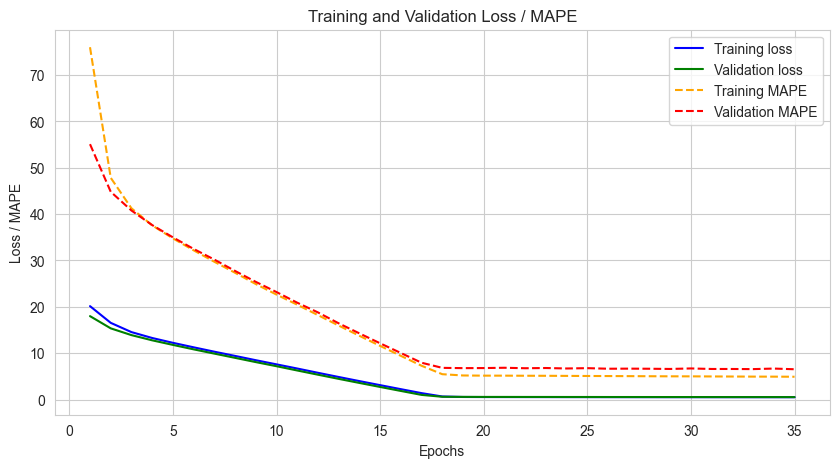

Final Training Loss: 0.4940046966075897
Final Validation Loss: 0.5206560492515564
Final Training MAPE: 4.911575794219971
Final Validation MAPE: 6.527726173400879


In [217]:
# training history
training_loss = history.history['loss']
training_mape = history.history['mape']
val_loss = history.history['val_loss']
val_mape = history.history['val_mape']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 5))

# Plot training and validation loss 
plt.plot(epochs, training_loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')

# Plot training and validation MAPE 
plt.plot(epochs, training_mape, color='orange', linestyle='--', label='Training MAPE')
plt.plot(epochs, val_mape, color='red', linestyle='--', label='Validation MAPE')

plt.title('Training and Validation Loss / MAPE')
plt.xlabel('Epochs')
plt.ylabel('Loss / MAPE')
plt.grid(True)
plt.legend()
plt.show()

# Extract the final loss and MAPE values
final_training_loss = training_loss[-1]
final_val_loss = val_loss[-1]
final_training_mape = training_mape[-1]
final_val_mape = val_mape[-1]

# Print the final loss and MAPE values
print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_val_loss)
print("Final Training MAPE:", final_training_mape)
print("Final Validation MAPE:", final_val_mape)


In [167]:
# Calculate MAE for training prediction
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)

# Print the mean of train MAE
print("Mean of Train MAE:", np.mean(trainMAE))

# Plot histogram of MAE
plt.figure(figsize=(8, 6))
plt.hist(trainMAE, bins=30)
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Absolute Error (MAE) in Training Prediction')
plt.show()

# Calculate MAPE for each sample
trainActual = trainX  # Assuming trainX contains the actual values

# Prevent division by zero by replacing zeros with a small number (e.g., 1e-8)
trainActual = np.where(trainActual == 0, 1e-8, trainActual)

trainMAPE = np.mean(np.abs(trainPredict - trainActual) / trainActual, axis=1) * 100

# Print the mean of MAPE
print("Mean of Train MAPE:", np.mean(trainMAPE))

# Handle infinite values (replace with NaN)
trainMAPE = np.where(np.isinf(trainMAPE), np.nan, trainMAPE)

# Plot histogram of MAPE
plt.figure(figsize=(8, 6))
plt.hist(trainMAPE[~np.isnan(trainMAPE)], bins=30)  # Only plot non-NaN values
plt.xlabel('Mean Absolute Percentage Error (MAPE)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Absolute Percentage Error (MAPE) in Training Prediction')
plt.show()


92/96 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


KeyboardInterrupt



In [ ]:
# Calculate reconstruction loss (MAE) for testing dataset
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)

# Print the mean of test MAE
print("Mean of Test MAE:", np.mean(testMAE))

# Plot histogram of MAE
plt.hist(testMAE, bins=30)
plt.xlabel('Test MAE')
plt.ylabel('Frequency')
plt.title('Histogram of Test MAE')
plt.show()

# Calculate MAPE for each sample
testActual = testX  # Assuming testX contains the actual values

# Prevent division by zero by replacing zeros with a small number (e.g., 1e-8)
testActual = np.where(testActual == 0, 1e-8, testActual)

testMAPE = np.mean(np.abs(testPredict - testActual) / testActual, axis=1) * 100

# Print the mean of MAPE
print("Mean of Test MAPE:", np.mean(testMAPE))

# Handle infinite values (replace with NaN)
testMAPE = np.where(np.isinf(testMAPE), np.nan, testMAPE)

# Plot histogram of MAPE
plt.figure(figsize=(8, 6))
plt.hist(testMAPE[~np.isnan(testMAPE)], bins=30)  # Only plot non-NaN values
plt.xlabel('Mean Absolute Percentage Error (MAPE)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Absolute Percentage Error (MAPE) in Test Prediction')
plt.show()
